## Import Libraries

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import MinMaxScaler

## Utility Function

### Histogram

In [134]:
# Create a histogram
def sea_histogram(dataframe_to_plot, column_of_interest, figsize=(8,10), title=None, xlabel=None, 
                  ylabel=None, hue=None, palette="deep", stat="count", binwidth=None,
                  multiple="layer", element="step", fill=True, shrink=1, kde=False, color="blue", 
                  log_scale=None, ylog=False, xlog=False, show_grid=False):

    plt.figure(figsize=figsize)
    
    if hue:
        sns.histplot(data=dataframe_to_plot, x=column_of_interest, hue=hue, stat=stat, 
                     binwidth=binwidth, multiple=multiple, element=element, fill=fill, 
                     shrink=shrink, kde=kde, palette=palette, log_scale=log_scale)
    else:
        sns.histplot(data=dataframe_to_plot, x=column_of_interest, stat=stat, 
                     binwidth=binwidth, element=element, fill=fill,
                     shrink=shrink, kde=kde, color=color, log_scale=log_scale)
        
    if ylog:
        plt.yscale("log")

    if xlog:
        plt.xscale("log")

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    if show_grid:
        plt.grid(True)

    plt.show()

### Box Plot

In [135]:
# Create a boxplot
def boxplot_func(columns_of_interest, data_frame, whis=1.5, yscale=None, title=None):

    data_frame.boxplot(column=columns_of_interest, whis=whis)
    
    if yscale is not None:
        plt.yscale(yscale)

    plt.title(title) 
    plt.show()  

### Sorting Columns

In [136]:
def reorder_columns(dataframe, columns):
    """
    Reorders the columns of the DataFrame based on the number of unique values in each column.
    Columns with only two unique values are placed first, followed by other columns.

    Args:
    - dataframe (DataFrame): The pandas DataFrame.
    - columns (list): A list containing the names of the columns to be reordered.

    Returns:
    - list: A list containing the reordered column names.
    """

    reordered_columns = []  # List to store column names with only two unique values
    non_bin_columns = []     # List to store column names with more than two unique values

    # Iterate through the specified columns
    for col in columns:
        # Check if the number of unique values in the column is equal to 2
        if dataframe[col].value_counts().count() == 2:
            # If yes, append the column name to reordered_columns
            reordered_columns.append(col)
        else:
            # If no, append the column name to non_bin_columns
            non_bin_columns.append(col)

    # Combine the two lists to get the final reordered column order
    reordered_columns = reordered_columns + non_bin_columns
    
    return reordered_columns


### Binary Columns to Int

In [137]:
def binary_columns_to_int(dataframe, columns):
    """
    Convert binary columns to integer values in the DataFrame.

    Args:
        dataframe (DataFrame): The pandas DataFrame to operate on.
        columns (list): A list of column names to check for binary values.

    Returns:
        None: The function modifies the DataFrame in place.

    """
    # Find the binary columns in the DataFrame
    binary_columns = []

    for col in columns:
        if dataframe[col].nunique() == 2:  
            binary_columns.append(col)
    
    # Convert the values of binary columns to integers
    for col in binary_columns:
        dataframe[col] = dataframe[col].apply(lambda x: int(x) if pd.notna(x) and isinstance(x, (int, float)) else x)

## Loading Datasets

In [138]:
chl_dataset=pd.read_excel("Datasets/OrmoniTiroidei3Aprile2024.xlsx")
date_dataset=pd.read_excel("Datasets/DataPrelievo.xlsx")
creatinina_dataset=pd.read_excel("Datasets/Creatinina_AltriEsamiCorretti.xlsx")

In [139]:
#To display all columns
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [140]:
chl_dataset.head()

,Number,Gender (Male = 1),Age,Total cholesterol,HDL,LDL,Triglycerides,Glycemia,TSH,fT3,fT4,Euthyroid,Subclinical primary hypothyroidism (SCH),Subclinical primary hyperthyroidism\n(SCT),Low T3,Ipotiroidismo,Ipertiroidismo,Angina,Previous CABG,Previous PCI,Previous Myocardial Infarction,Acute Myocardial Infarction,Angiography,Vessels,CAD,Documented resting \nor exertional ischemia,Post-ischemic Dilated\nCardiomyopathy,Primary Dilated\nCardiomyopathy,Normal,SindromeX,AMI,PMI,Aritmie,MIN,MIO,Miocardite,Pericardite,Endocardite,Valvulopatie,MalattiaVasoAorta,Ipertensione,CardiopatiaCongenita,EmboliaPolmonare,EPA,HR,Weight,Height,BMI,Diastolic blood pressure,Systolic blood pressure,Smoke\nHistory of smoke,Diabetes\nHistory of diabetes,Hypertension\nHistory of hypertension,Dyslipidemia\nHystory of dyslipidemia,Atrial Fibrillation,WmsiBas,DimSettoIV,DimPP,fe,vsx,B-Blockers,Amiodarone,Calcium channel blockers,Diuretics,Antiplatelet,Nitrates,ACE-inhibitors,Ipolipemizzanti,Antidiabetici,Follow Up Data,Data of death,Cause of death,Collected by,Total mortality,CVD Death,Fatal MI or Sudden death,UnKnown,Accident,Suicide,CABG,Non Fatal AMI (Follow-Up),Ictus,PCI
0,1.0,1.0,56.033708,196.0,52.0,118.0,130.0,104.0,1.26,2.72,12.3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55.0,72.0,165.0,26.446281,65.0,100.0,0.0,0.0,0.0,1.0,0.0,2.44,10.0,9.0,35.0,56.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,2013-09-20,NaT,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,2004-12-01,NaT,NaT,NaT
1,2.0,1.0,62.898876,123.0,43.0,71.0,45.0,220.0,0.73,2.78,12.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70.0,80.0,170.0,27.681661,70.0,140.0,1.0,1.0,0.0,1.0,0.0,1.18,11.0,9.0,53.0,54.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2013-01-08,NaT,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaT,NaT,NaT,NaT
2,3.0,1.0,60.876404,248.0,37.0,180.0,157.0,87.0,1.65,1.74,8.2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70.0,73.0,170.0,25.259516,80.0,140.0,0.0,0.0,0.0,1.0,0.0,1.29,10.0,10.0,48.0,54.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,2013-05-14,NaT,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,2004-02-19,NaT,NaT,NaT
3,4.0,1.0,75.396067,NaN,NaN,NaN,NaN,NaN,0.40,7.20,17.2,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75.0,75.0,172.0,25.351541,60.0,120.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,39.0,67.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1994-06-29,1994-06-29,Other cardiac causes,Necropsy certificate,1.0,1.0,0.0,0.0,0.0,0.0,NaT,NaT,NaT,NaT
4,5.0,1.0,80.803371,139.0,33.0,81.0,126.0,103.0,7.32,2.22,11.9,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,70.0,69.0,168.0,24.447279,70.0,110.0,0.0,1.0,1.0,1.0,1.0,2.00,NaN,NaN,40.0,72.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2007-06-10,2007-06-10,Sudden death,Relatives (Telephone interview),1.0,1.0,1.0,0.0,0.0,0.0,NaT,NaT,NaT,NaT


In [141]:
date_dataset.head()

,Number,Data prelievo
0,1,2003-08-25
1,2,2010-10-19
2,3,2004-01-09
3,4,1994-01-24
4,5,2003-10-28


In [142]:
creatinina_dataset.head()

,Number,Total cholesterol,HDL,LDL,Triglycerides,Creatinina
0,1,196.0,52.0,118.0,130.0,0.83
1,2,123.0,43.0,71.0,45.0,0.80
2,3,248.0,37.0,180.0,157.0,1.01
3,4,NaN,NaN,NaN,NaN,NaN
4,5,139.0,33.0,81.0,126.0,1.59


In [143]:
chl_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8144 entries, 0 to 8143
Data columns (total 83 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   Number                                      8065 non-null   float64       
 1   Gender (Male = 1)                           8065 non-null   float64       
 2   Age                                         8065 non-null   float64       
 3   Total cholesterol                           7705 non-null   float64       
 4   HDL                                         7455 non-null   float64       
 5   LDL                                         6905 non-null   float64       
 6   Triglycerides                               7627 non-null   float64       
 7   Glycemia                                    7651 non-null   float64       
 8   TSH                                         8065 non-null   float64       
 9   fT3     

In [144]:
creatinina_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8065 entries, 0 to 8064
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Number             8065 non-null   int64  
 1   Total cholesterol  7705 non-null   float64
 2   HDL                7455 non-null   float64
 3   LDL                7433 non-null   float64
 4   Triglycerides      7627 non-null   float64
 5   Creatinina         7469 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 378.2 KB


In [145]:
chl_dataset=chl_dataset.drop(columns=["HDL", "LDL", "Triglycerides", "Total cholesterol"])

In [146]:
chl_dataset=pd.merge(chl_dataset, creatinina_dataset, on="Number")
merge_dataset=pd.merge(chl_dataset, date_dataset, on=["Number"])

## Cleaning Dataset

In [147]:
chl_dataset=chl_dataset.dropna(subset=["Number"])
date_dataset=date_dataset.dropna(subset=["Number"])

In [148]:
chl_dataset=chl_dataset.drop(columns=["PCI", "Ictus", "Non Fatal AMI (Follow-Up)", "CABG ", "Suicide",
                          "Accident", "UnKnown", "Fatal MI or Sudden death",
                          "CVD Death", "Total mortality", "Collected by", "Cause of death"])

In [149]:
chl_dataset=chl_dataset.drop(columns=["Follow Up Data", "Data of death"])

In [150]:
data_columns=chl_dataset.columns
data_columns

reordered_columns=reorder_columns(chl_dataset, data_columns)

In [151]:
chl_dataset = chl_dataset.reindex(columns=reordered_columns)

In [152]:
for col in chl_dataset.columns:
    if chl_dataset[col].nunique() < 2:
        print(col)

CardiopatiaCongenita


In [153]:
chl_dataset=chl_dataset.drop(columns=["CardiopatiaCongenita"])

In [154]:
chl_dataset.isna().sum()

Gender (Male = 1)                                0
Euthyroid                                        0
Subclinical primary hypothyroidism (SCH)         0
Subclinical primary hyperthyroidism\n(SCT)       0
Low T3                                           0
Ipotiroidismo                                    0
Ipertiroidismo                                   0
Angina                                           0
Previous CABG                                    0
Previous PCI                                     0
Previous Myocardial Infarction                   0
Acute Myocardial Infarction                      0
Angiography                                      0
CAD                                              0
Documented resting \nor exertional ischemia      0
Post-ischemic Dilated\nCardiomyopathy            0
Primary Dilated\nCardiomyopathy                  0
Normal                                           0
SindromeX                                        0
AMI                            

## Creating Labels

In [155]:
#Function to set the target column based on the presence of values in the "Data of death" column
def set_target(row):
    if pd.isnull(row['Data of death']):
        return 0
    else:
        return 2
    
#Function to set the target column based on the date of death 
def set_target2(row):
    if row['Target'] == 2:
        if (row['Follow Up Data'] - row['Data prelievo']).days / 365 < 8:
            return 1
        else:
            return 0
    else:
        return row['Target']

In [156]:
merge_dataset['Target'] = merge_dataset.apply(set_target, axis=1)
merge_dataset['Target'] = merge_dataset.apply(set_target2, axis=1)

In [157]:
merge_dataset.Target.value_counts()

Target
0    6049
1    2016
Name: count, dtype: int64

## Add Target to Dataset

In [158]:
chl_dataset= pd.merge(chl_dataset, merge_dataset[['Number', 'Target']], on='Number', how='left')

In [159]:
chl_dataset.head()

,Gender (Male = 1),Euthyroid,Subclinical primary hypothyroidism (SCH),Subclinical primary hyperthyroidism\n(SCT),Low T3,Ipotiroidismo,Ipertiroidismo,Angina,Previous CABG,Previous PCI,Previous Myocardial Infarction,Acute Myocardial Infarction,Angiography,CAD,Documented resting \nor exertional ischemia,Post-ischemic Dilated\nCardiomyopathy,Primary Dilated\nCardiomyopathy,Normal,SindromeX,AMI,PMI,Aritmie,MIN,MIO,Miocardite,Pericardite,Endocardite,Valvulopatie,MalattiaVasoAorta,Ipertensione,EmboliaPolmonare,EPA,Smoke\nHistory of smoke,Diabetes\nHistory of diabetes,Hypertension\nHistory of hypertension,Dyslipidemia\nHystory of dyslipidemia,Atrial Fibrillation,B-Blockers,Amiodarone,Calcium channel blockers,Diuretics,Antiplatelet,Nitrates,ACE-inhibitors,Ipolipemizzanti,Antidiabetici,Number,Age,Glycemia,TSH,fT3,fT4,Vessels,HR,Weight,Height,BMI,Diastolic blood pressure,Systolic blood pressure,WmsiBas,DimSettoIV,DimPP,fe,vsx,Total cholesterol,HDL,LDL,Triglycerides,Creatinina,Target
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,56.033708,104.0,1.26,2.72,12.3,3.0,55.0,72.0,165.0,26.446281,65.0,100.0,2.44,10.0,9.0,35.0,56.0,196.0,52.0,118.0,130.0,0.83,0
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,62.898876,220.0,0.73,2.78,12.5,0.0,70.0,80.0,170.0,27.681661,70.0,140.0,1.18,11.0,9.0,53.0,54.0,123.0,43.0,71.0,45.0,0.80,0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,60.876404,87.0,1.65,1.74,8.2,3.0,70.0,73.0,170.0,25.259516,80.0,140.0,1.29,10.0,10.0,48.0,54.0,248.0,37.0,180.0,157.0,1.01,0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,4.0,75.396067,NaN,0.40,7.20,17.2,0.0,75.0,75.0,172.0,25.351541,60.0,120.0,NaN,NaN,NaN,39.0,67.0,NaN,NaN,NaN,NaN,NaN,1
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,5.0,80.803371,103.0,7.32,2.22,11.9,3.0,70.0,69.0,168.0,24.447279,70.0,110.0,2.00,NaN,NaN,40.0,72.0,139.0,33.0,81.0,126.0,1.59,1


In [160]:
chl_dataset=chl_dataset.drop(columns="Number")

## Normalize Dataset

In [161]:
scaler = MinMaxScaler()

In [162]:
# Normalize all columns of the dataset
chl_dataset_normalized = scaler.fit_transform(chl_dataset)
# Optionally, convert the normalized dataset to a pandas DataFrame
chl_dataset_normalized = pd.DataFrame(chl_dataset_normalized, columns=chl_dataset.columns)

In [163]:
chl_dataset_normalized.head()

,Gender (Male = 1),Euthyroid,Subclinical primary hypothyroidism (SCH),Subclinical primary hyperthyroidism\n(SCT),Low T3,Ipotiroidismo,Ipertiroidismo,Angina,Previous CABG,Previous PCI,Previous Myocardial Infarction,Acute Myocardial Infarction,Angiography,CAD,Documented resting \nor exertional ischemia,Post-ischemic Dilated\nCardiomyopathy,Primary Dilated\nCardiomyopathy,Normal,SindromeX,AMI,PMI,Aritmie,MIN,MIO,Miocardite,Pericardite,Endocardite,Valvulopatie,MalattiaVasoAorta,Ipertensione,EmboliaPolmonare,EPA,Smoke\nHistory of smoke,Diabetes\nHistory of diabetes,Hypertension\nHistory of hypertension,Dyslipidemia\nHystory of dyslipidemia,Atrial Fibrillation,B-Blockers,Amiodarone,Calcium channel blockers,Diuretics,Antiplatelet,Nitrates,ACE-inhibitors,Ipolipemizzanti,Antidiabetici,Age,Glycemia,TSH,fT3,fT4,Vessels,HR,Weight,Height,BMI,Diastolic blood pressure,Systolic blood pressure,WmsiBas,DimSettoIV,DimPP,fe,vsx,Total cholesterol,HDL,LDL,Triglycerides,Creatinina,Target
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.485547,0.105209,0.013221,0.029471,0.092701,0.75,0.103586,0.301587,0.486111,0.307955,0.291667,0.20,0.765957,0.166667,0.054945,0.337838,0.472973,0.256364,0.340741,0.114754,0.122222,0.058780,0.0
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.564569,0.223698,0.007615,0.030146,0.094217,0.00,0.163347,0.365079,0.555556,0.335212,0.333333,0.40,0.095745,0.200000,0.054945,0.581081,0.445946,0.123636,0.274074,0.063388,0.036364,0.056576,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.541289,0.087845,0.017345,0.018448,0.061624,0.75,0.163347,0.309524,0.555556,0.281771,0.416667,0.40,0.154255,0.166667,0.065934,0.513514,0.445946,0.350909,0.229630,0.182514,0.149495,0.072006,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.708420,NaN,0.004125,0.079865,0.129842,0.00,0.183267,0.325397,0.583333,0.283802,0.250000,0.30,NaN,NaN,NaN,0.391892,0.621622,NaN,NaN,NaN,NaN,NaN,1.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.770661,0.104188,0.077314,0.023847,0.089669,0.75,0.163347,0.277778,0.527778,0.263851,0.333333,0.25,0.531915,NaN,NaN,0.405405,0.689189,0.152727,0.200000,0.074317,0.118182,0.114622,1.0


In [164]:
binary_columns_to_int(chl_dataset_normalized, chl_dataset_normalized.columns)

In [165]:
chl_dataset_normalized.head()

,Gender (Male = 1),Euthyroid,Subclinical primary hypothyroidism (SCH),Subclinical primary hyperthyroidism\n(SCT),Low T3,Ipotiroidismo,Ipertiroidismo,Angina,Previous CABG,Previous PCI,Previous Myocardial Infarction,Acute Myocardial Infarction,Angiography,CAD,Documented resting \nor exertional ischemia,Post-ischemic Dilated\nCardiomyopathy,Primary Dilated\nCardiomyopathy,Normal,SindromeX,AMI,PMI,Aritmie,MIN,MIO,Miocardite,Pericardite,Endocardite,Valvulopatie,MalattiaVasoAorta,Ipertensione,EmboliaPolmonare,EPA,Smoke\nHistory of smoke,Diabetes\nHistory of diabetes,Hypertension\nHistory of hypertension,Dyslipidemia\nHystory of dyslipidemia,Atrial Fibrillation,B-Blockers,Amiodarone,Calcium channel blockers,Diuretics,Antiplatelet,Nitrates,ACE-inhibitors,Ipolipemizzanti,Antidiabetici,Age,Glycemia,TSH,fT3,fT4,Vessels,HR,Weight,Height,BMI,Diastolic blood pressure,Systolic blood pressure,WmsiBas,DimSettoIV,DimPP,fe,vsx,Total cholesterol,HDL,LDL,Triglycerides,Creatinina,Target
0,1,1,0,0,0,0,0,1,1,1,1,0,1,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,1,1,0.0,0.0,0.485547,0.105209,0.013221,0.029471,0.092701,0.75,0.103586,0.301587,0.486111,0.307955,0.291667,0.20,0.765957,0.166667,0.054945,0.337838,0.472973,0.256364,0.340741,0.114754,0.122222,0.058780,0
1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,1.0,1.0,0.564569,0.223698,0.007615,0.030146,0.094217,0.00,0.163347,0.365079,0.555556,0.335212,0.333333,0.40,0.095745,0.200000,0.054945,0.581081,0.445946,0.123636,0.274074,0.063388,0.036364,0.056576,0
2,1,0,0,0,1,0,0,1,0,0,1,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,1.0,0.0,0.541289,0.087845,0.017345,0.018448,0.061624,0.75,0.163347,0.309524,0.555556,0.281771,0.416667,0.40,0.154255,0.166667,0.065934,0.513514,0.445946,0.350909,0.229630,0.182514,0.149495,0.072006,0
3,1,0,0,0,0,0,1,1,1,0,1,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0.0,0.0,0.708420,NaN,0.004125,0.079865,0.129842,0.00,0.183267,0.325397,0.583333,0.283802,0.250000,0.30,NaN,NaN,NaN,0.391892,0.621622,NaN,NaN,NaN,NaN,NaN,1
4,1,0,1,0,0,0,0,1,1,1,1,0,1,1,1,1,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,1,1,1,1,1,0,0,1,0,1,0,0.0,0.0,0.770661,0.104188,0.077314,0.023847,0.089669,0.75,0.163347,0.277778,0.527778,0.263851,0.333333,0.25,0.531915,NaN,NaN,0.405405,0.689189,0.152727,0.200000,0.074317,0.118182,0.114622,1


## Storing Dataset in csv File

In [166]:
# Get the directory of the script
script_directory = os.getcwd()

# Specify the folder name
folder_name = 'Datasets/Cleaned_Dataset'

# Combine the script directory and folder name to get the full path
folder_path = os.path.join(script_directory, folder_name)

# Check if the folder exists, and create it if not
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

chl_dataset_normalized.to_csv(path_or_buf=f'{folder_name}/chl_dataset.csv', index=False)

## PCA

**Principal Component Analysis** is a tecnique that can be useful when we can't plot the data because it has too many dimensions, or when there are no data concentrations or clear separation in groups. When those situations occur, it's recommended to try reducing data dimensions with this method. PCA will reduce the dimensions of our data while trying to preserve as much of its information as possible. Let's first get an idea about how PCA works, and then we can choose how many data dimensions we will reduce our data to.

For each pair of features, PCA sees if the greater values of one variable correspond with the greater values of the other variable, and it does the same for the lesser values. So, it essentially computes how much the feature values vary towards one another - we call that their *covariance*. Those results are then organized into a matrix, called **covariance matrix**.

After getting the covariance matrix, PCA tries to find a linear combination of features that best explains it - it fits linear models until it identifies the one that explains the maximum amount of variance. With the best line - linear combination - found, PCA gets the directions of its axes, called *eigenvectors*, and its linear coefficients, the *eigenvalues*. The combination of the eigenvectors and eigenvalues - or axes directions and coefficients - are the Principal Components of PCA. And that is when we can choose our number of dimensions based on the explained variance of each feature, by understanding which principal components we want to keep or discard based on how much variance they explain.

After obtaining the principal components, PCA uses the eigenvectors to form a vector of features that reorient the data from the original axes to the ones represented by the principal components - that's how the data dimensions are reduced.

In [167]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

In [168]:
chl_dataset=chl_dataset.dropna()

In [169]:
scaler = StandardScaler()
X_std = scaler.fit_transform(chl_dataset.values)

In [170]:
scaler = MinMaxScaler()
X_minmax = scaler.fit_transform(chl_dataset.values)

In [171]:
pca = PCA(n_components=35)
pca.fit_transform(X_std)
pca.explained_variance_ratio_.cumsum()

array([0.08741591, 0.15841862, 0.20404341, 0.2458247 , 0.28145725,
       0.31293095, 0.34332699, 0.37165084, 0.39673315, 0.41939807,
       0.4416639 , 0.46372514, 0.48389854, 0.50323064, 0.52168278,
       0.53992472, 0.55735553, 0.57412947, 0.59049932, 0.60638024,
       0.62157872, 0.63658853, 0.65135565, 0.6659777 , 0.68042589,
       0.69467779, 0.7083924 , 0.72170814, 0.73456754, 0.74731279,
       0.75976014, 0.77206856, 0.78399803, 0.79577206, 0.80694803])

In [172]:
pca = PCA(n_components=20)
pca.fit_transform(X_minmax)
pca.explained_variance_ratio_.cumsum()

array([0.17683041, 0.258924  , 0.33252627, 0.38319645, 0.42671543,
       0.46879355, 0.50908086, 0.5476083 , 0.58254969, 0.61645166,
       0.64756716, 0.67798351, 0.70475181, 0.72919587, 0.75164274,
       0.77363386, 0.7940054 , 0.8117667 , 0.82818196, 0.84285429])

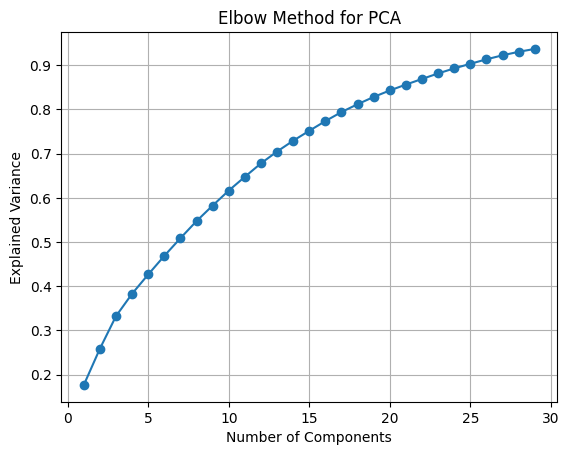

In [173]:
# Fit PCA with different numbers of components
n_components_range = range(1, 30)  # Adjust the range as needed
explained_variance = []

for n_components in n_components_range:
    pca = PCA(n_components=n_components)
    pca.fit_transform(X_minmax)
    explained_variance.append(pca.explained_variance_ratio_.sum())

# Plot the explained variance against the number of components
plt.plot(n_components_range, explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.title('Elbow Method for PCA')
plt.grid(True)
plt.show()

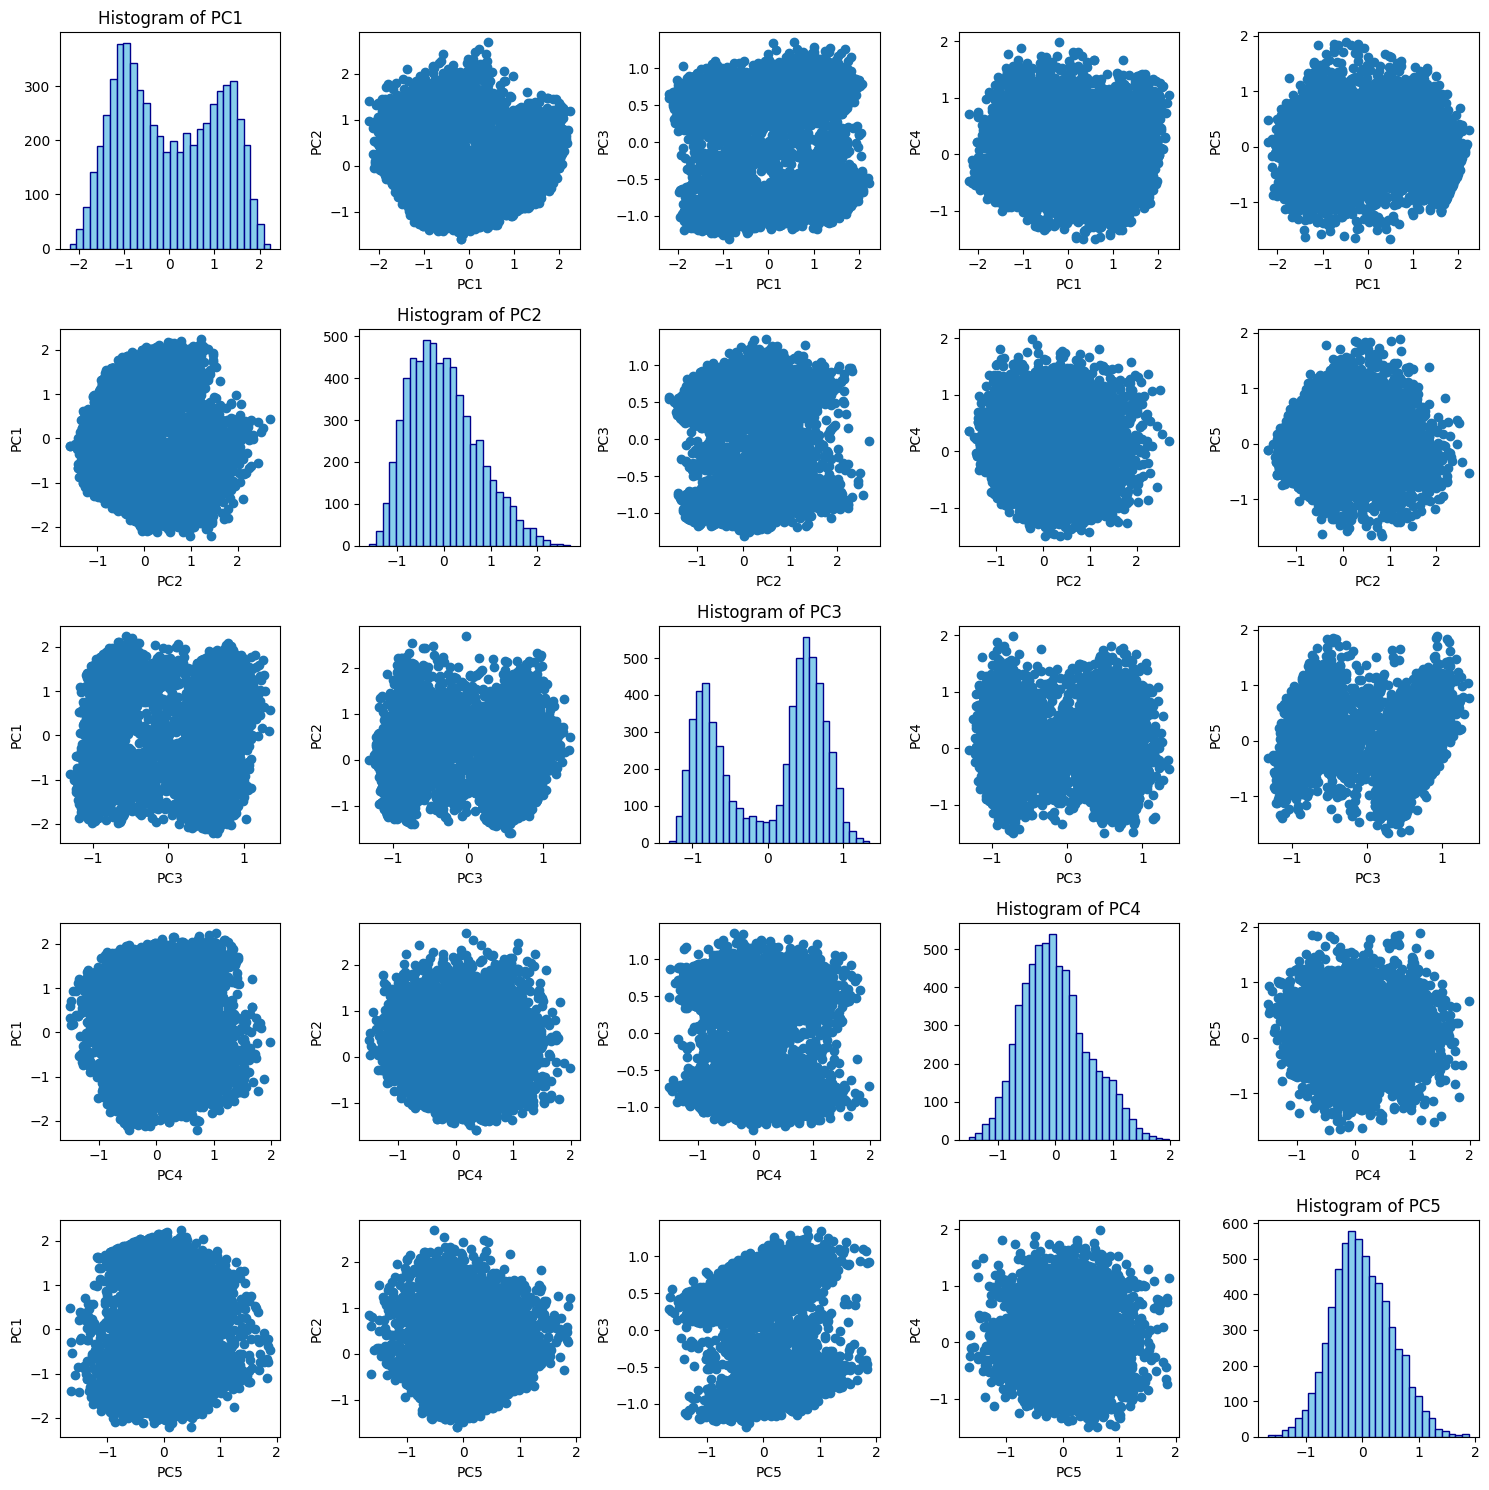

In [174]:
pca = PCA(n_components=5)
pcs = pca.fit_transform(X_minmax)

n_components = pca.n_components_
fig, axes = plt.subplots(n_components, n_components, figsize=(15, 15))

for i in range(n_components):
    for j in range(n_components):
        if i == j:
            axes[i, j].hist(pcs[:, i], bins=30, color='skyblue', ec='darkblue')
            axes[i, j].set_title(f'Histogram of PC{i+1}')
        else:
            axes[i, j].scatter(pcs[:, i], pcs[:, j])
            axes[i, j].set_xlabel(f'PC{i+1}')
            axes[i, j].set_ylabel(f'PC{j+1}')

plt.tight_layout()
plt.show()

## Old Dataset

In [175]:
old_dataset=pd.read_csv("Datasets/data.csv")

In [176]:
old_dataset.head()

,N. patients,Gender (Male = 1),Age,Angina,Previous CABG,Previous PCI,Previous Myocardial Infarction,Acute Myocardial Infarction,Angiography,Vessels,FE,Documented resting \nor exertional ischemia,Post-ischemic Dilated\nCardiomyopathy,Smoke\nHistory of smoke,Diabetes\nHistory of diabetes,Hypertension\nHistory of hypertension,Hyperlipemia\nHistoty of hyperlipemia,Paroxysmal or chronic \natrial fibrillation,Creatinina,Survive7Y
0,1,1,54,1,0,0,0,0,1,5.0,46,1,0,1,0,0,0,0,0.00,0
1,3,1,56,1,1,1,1,0,0,4.0,35,1,1,0,0,0,1,0,0.83,1
2,5,1,61,1,0,0,1,0,1,4.0,48,1,0,0,0,0,1,0,1.10,1
3,7,1,75,1,1,0,1,0,0,0.0,39,1,0,1,0,0,0,0,0.00,0
4,8,1,81,1,1,1,1,0,1,4.0,40,1,1,0,1,1,1,1,1.59,0


In [177]:
old_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3987 entries, 0 to 3986
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   N. patients                                 3987 non-null   int64  
 1   Gender (Male = 1)                           3987 non-null   int64  
 2   Age                                         3987 non-null   int64  
 3   Angina                                      3987 non-null   int64  
 4   Previous CABG                               3987 non-null   int64  
 5   Previous PCI                                3987 non-null   int64  
 6   Previous Myocardial Infarction              3987 non-null   int64  
 7   Acute Myocardial Infarction                 3987 non-null   int64  
 8   Angiography                                 3987 non-null   int64  
 9   Vessels                                     3987 non-null   float64
 10  FE          

In [178]:
old_dataset.isna().sum()

N. patients                                    0
Gender (Male = 1)                              0
Age                                            0
Angina                                         0
Previous CABG                                  0
Previous PCI                                   0
Previous Myocardial Infarction                 0
Acute Myocardial Infarction                    0
Angiography                                    0
Vessels                                        0
FE                                             0
Documented resting \nor exertional ischemia    0
Post-ischemic Dilated\nCardiomyopathy          0
Smoke\nHistory of smoke                        0
Diabetes\nHistory of diabetes                  0
Hypertension\nHistory of hypertension          0
Hyperlipemia\nHistoty of hyperlipemia          0
Paroxysmal or chronic \natrial fibrillation    0
Creatinina                                     0
Survive7Y                                      0
dtype: int64

### Continuous Features

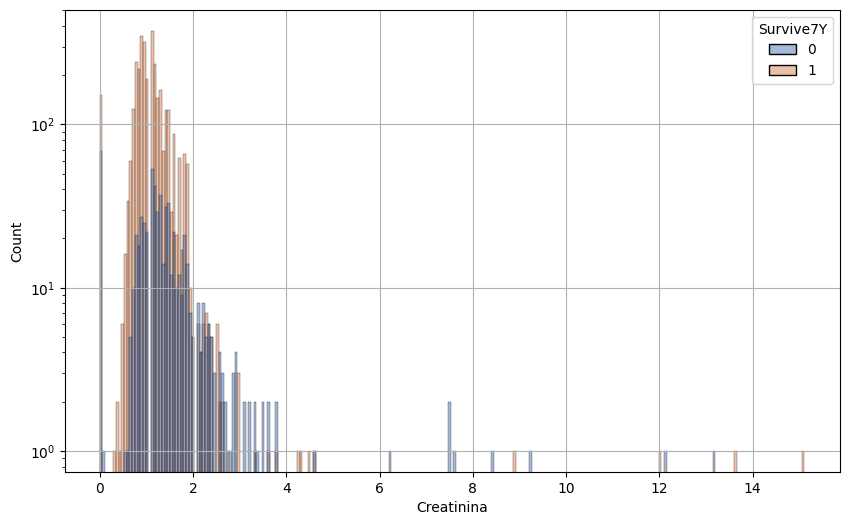

In [179]:
sea_histogram(old_dataset, 
              "Creatinina",
              figsize=(10, 6), 
              show_grid=True,
              xlabel="Creatinina",
              ylabel="Count",
              hue="Survive7Y",
              element="bars", 
              ylog=True,
              color="coral")

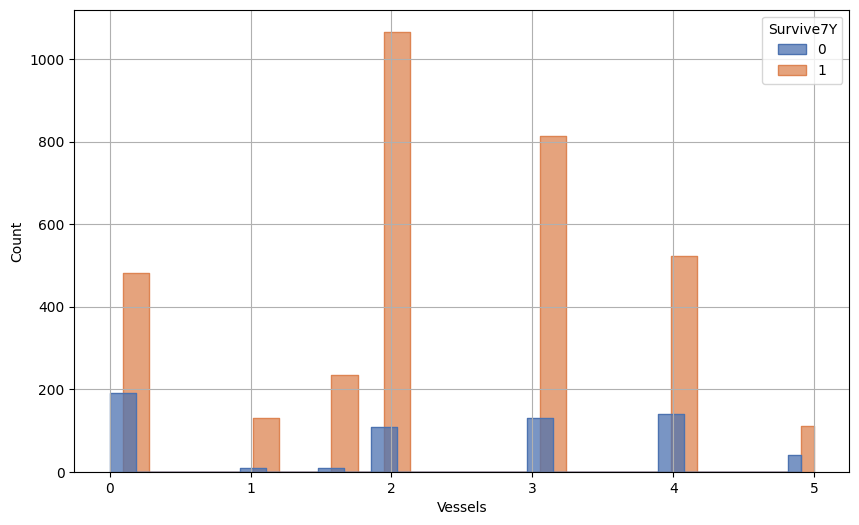

In [180]:
sea_histogram(old_dataset, 
              "Vessels",
              figsize=(10, 6), 
              show_grid=True,
              xlabel="Vessels",
              ylabel="Count",
              hue="Survive7Y",
              element="step",
              multiple="dodge", 
              #ylog=True,
              color="coral")